# PART 7

In [2]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# 데이터 살펴보기
print(df.head())   
print('\n')

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  




In [3]:

'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

# horsepower 열의 자료형 변경 (문자열 ->숫자)
print(df['horsepower'].unique())          # horsepower 열의 고유값 확인
print('\n')

df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

print(df.describe())                                     # 데이터 통계 요약정보 확인
print('\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000 

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0




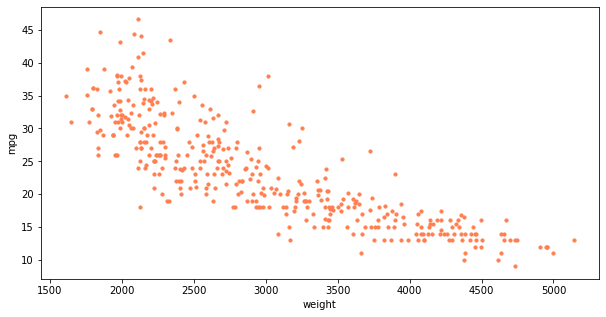

In [4]:
'''
[Step 3] 속성(feature 또는 variable) 선택
'''

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())   
print('\n')

### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()


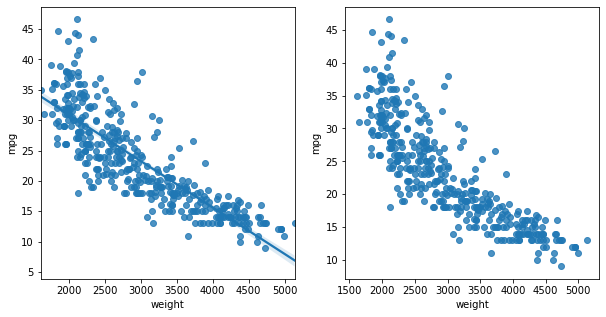

In [5]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)                 # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)  #회귀선 미표시
plt.show()
plt.close()

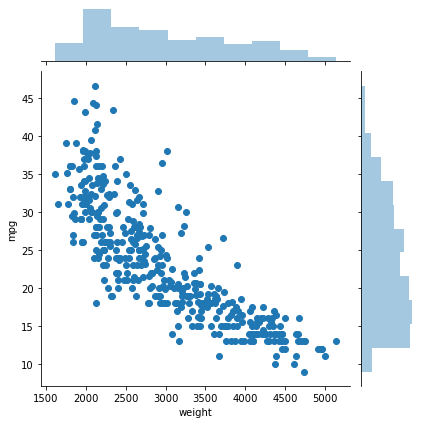

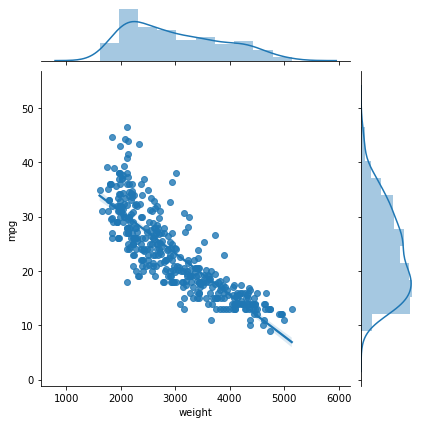

In [6]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)              # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)  # 회귀선 표시
plt.show()
plt.close()

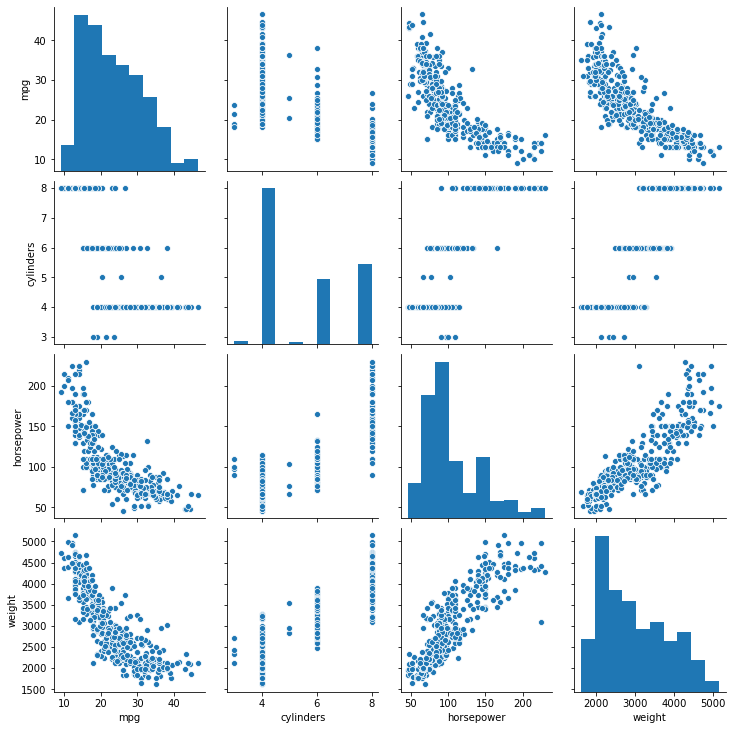

In [7]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)  
plt.show()
plt.close()

In [8]:

'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']       #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))


train data 개수:  274
test data 개수:  118


In [15]:
'''
Step 5: 단순회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b', lr.intercept_)
print('\n')

기울기 a:  [-0.00775343]


y절편 b 46.7103662572801




In [21]:
# 모형에 테스트 데이터를 입력하여 예측한 값 y_test_hat을 실제 값 y_test와 비교 
y_test_hat = lr.predict(X_test)
y_comp = pd.DataFrame({'y':y_test, 'y_hat':y_test_hat})
print(y_comp)

        y      y_hat
243  21.5  25.621032
371  29.0  27.132951
300  23.9  20.193630
345  35.1  33.064327
265  17.5  15.076365
..    ...        ...
384  32.0  31.474873
20   25.0  25.993197
189  15.5  15.991270
60   20.0  28.040103
227  19.0  18.565409

[118 rows x 2 columns]


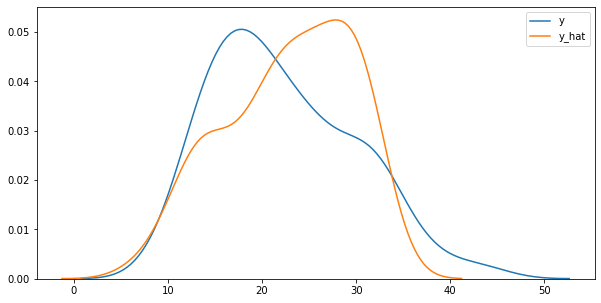

In [25]:
# 모형에 테스트 데이터를 입력하여 예측한 값 y_test_hat을 실제 값 y_test와 비교 
plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y_test, label="y")
ax2 = sns.kdeplot(y_test_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

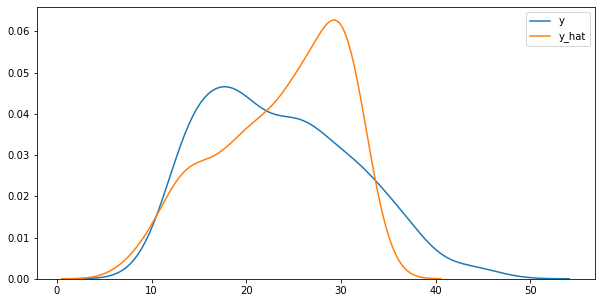

In [26]:
# 모형에 전체 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)
plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

In [24]:
import sklearn.metrics as sm
print(sm.mean_squared_error(y_test, y_test_hat))
print(sm.mean_absolute_error(y_test, y_test_hat))

17.990178941054804
3.1707042626625523


In [2]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1 ~ 4] 데이터 준비 
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   
print('\n')

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)




In [3]:
'''
Step 5: 비선형회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 필요한 모듈 가져오기 
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=2)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)     #X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  
print('\n')

print(X_train)
print(X_train_poly)

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


     weight
38   4209.0
172  2223.0
277  3410.0
196  2164.0
357  2615.0
..      ...
375  1980.0
322  2110.0
15   2833.0
127  2901.0
267  2560.0

[274 rows x 1 columns]
[[1.0000000e+00 4.2090000e+03 1.7715681e+07]
 [1.0000000e+00 2.2230000e+03 4.9417290e+06]
 [1.0000000e+00 3.4100000e+03 1.1628100e+07]
 [1.0000000e+00 2.1640000e+03 4.6828960e+06]
 [1.0000000e+00 2.6150000e+03 6.8382250e+06]
 [1.0000000e+00 2.3850000e+03 5.6882250e+06]
 [1.0000000e+00 2.7950000e+03 7.8120250e+06]
 [1.0000000e+00 3.2450000e+03 1.0530025e+07]
 [1.0000000e+00 3.1020000e+03 9.6224040e+06]
 [1.0000000e+00 2.5060000e+03 6.2800360e+06]
 [1.0000000e+00 3.5700000e+03 1.2744900e+07]
 [1.0000000e+00 1.9400000e+03 3.7636000e+06]
 [1.0000000e+00 2.9900000e+03 8.9401000e+06]
 [1.0000000e+00 2.0850000e+03 4.3472250e+06]
 [1.0000000e+00 2.8550000e+03 8.1510250e+06]
 [1.0000000e+00 3.2880000e+03 1.0810944e+07]
 [1.0000000e+00 2.1250000e+03 4.5156250e+06]
 [1.0000000e+00 2.2460000e

In [8]:
# train data를 가지고 모형 학습
pr = LinearRegression()   
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하기 위해 X_test 데이터를 2차항으로 변형
X_test_poly = poly.fit_transform(X_test)
print(X_test_poly)
y_hat_test = pr.predict(X_test_poly)
print(y_hat_test)
y_comp2 = pd.DataFrame({'y':y_test, 'y_hat':y_hat_test})
print(y_comp2)

[[1.0000000e+00 2.7200000e+03 7.3984000e+06]
 [1.0000000e+00 2.5250000e+03 6.3756250e+06]
 [1.0000000e+00 3.4200000e+03 1.1696400e+07]
 [1.0000000e+00 1.7600000e+03 3.0976000e+06]
 [1.0000000e+00 4.0800000e+03 1.6646400e+07]
 [1.0000000e+00 3.4450000e+03 1.1868025e+07]
 [1.0000000e+00 3.8700000e+03 1.4976900e+07]
 [1.0000000e+00 5.1400000e+03 2.6419600e+07]
 [1.0000000e+00 2.3350000e+03 5.4522250e+06]
 [1.0000000e+00 2.2780000e+03 5.1892840e+06]
 [1.0000000e+00 3.3360000e+03 1.1128896e+07]
 [1.0000000e+00 3.4320000e+03 1.1778624e+07]
 [1.0000000e+00 2.7200000e+03 7.3984000e+06]
 [1.0000000e+00 2.5850000e+03 6.6822250e+06]
 [1.0000000e+00 4.2740000e+03 1.8267076e+07]
 [1.0000000e+00 3.6720000e+03 1.3483584e+07]
 [1.0000000e+00 2.9040000e+03 8.4332160e+06]
 [1.0000000e+00 2.2200000e+03 4.9284000e+06]
 [1.0000000e+00 4.3760000e+03 1.9149376e+07]
 [1.0000000e+00 4.3540000e+03 1.8957316e+07]
 [1.0000000e+00 4.2200000e+03 1.7808400e+07]
 [1.0000000e+00 1.9900000e+03 3.9601000e+06]
 [1.000000

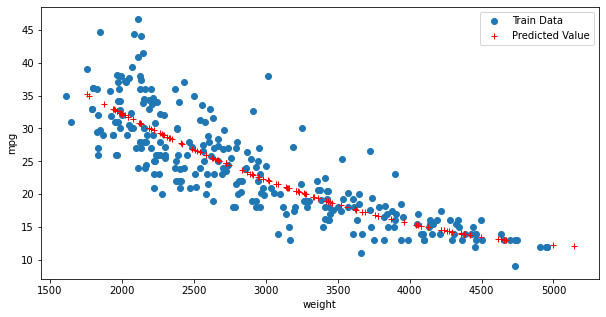

In [30]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

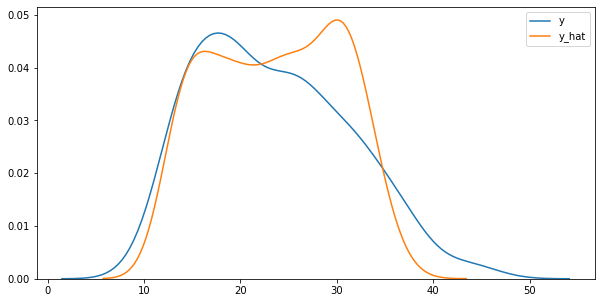

In [31]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

In [32]:
import sklearn.metrics as sm
print(sm.mean_squared_error(y_test, y_hat_test))
print(sm.mean_absolute_error(y_test, y_hat_test))

16.492381161410766
2.853602090197636
